In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as mh

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import scipy.optimize as opt
from scipy.odr import *
#from astropy import table

font=24
style='normal'

In [4]:
data = np.genfromtxt('/Users/abubakribrahim/Desktop/observations/SGR1935/sgr1935_persistent_spectra/spectral_analysis/BBPL_xmm_nustarr_spec.qdp', skip_header=3)  #eeufs

a = np.argwhere(np.isnan(data[:,0]))
a = a.flatten()

data = np.vsplit(data,a)
data_1 = data[0]
data_1b = data[1][1:]
data_2 = data[2][1:]
data_2b = data[3][1:]
#data_bb = data[4][1:]
#data_pl = data[5][1:]
#data_Oct2020 = data[6][1:]

resdata_1 = data[4][1:]
resdata_1b = data[5][1:]
resdata_2 = data[6][1:]
resdata_2b = data[7][1:]
#resdata_Sep2020 = data[11][1:]
#resdata_Sep2020b = data[12][1:]
#resdata_Oct2020 = data[13][1:]




/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_73009/2113514358.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)
/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_73009/2113514358.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)


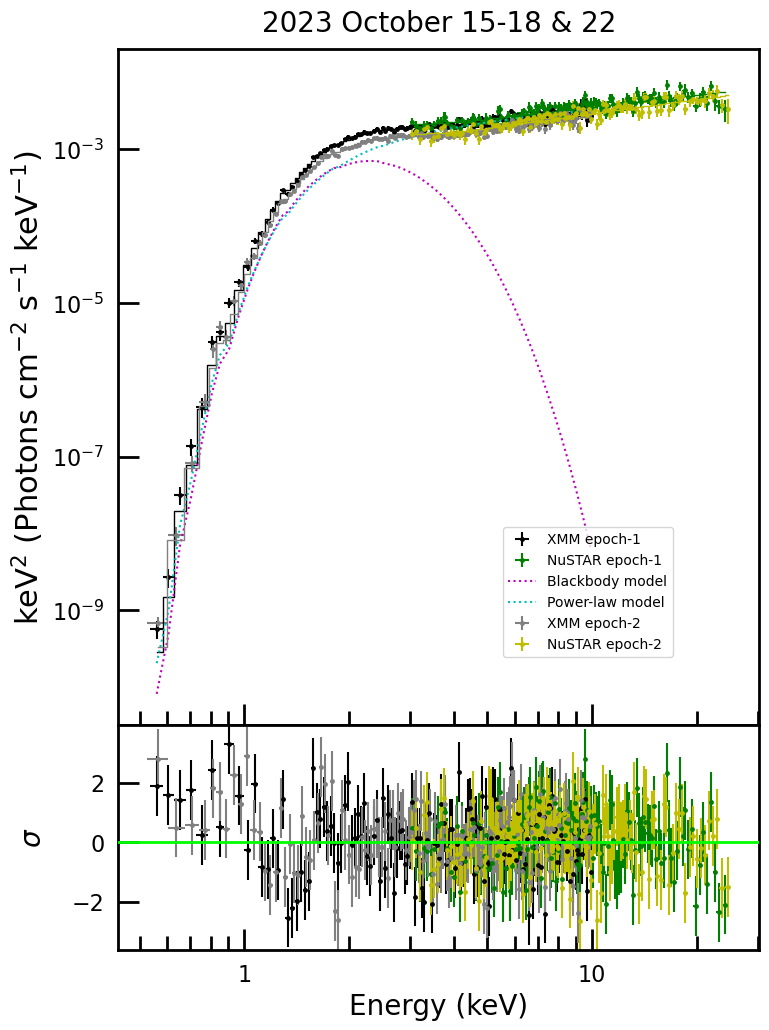

In [24]:
f1 = plt.figure(figsize=(8.27,11.69))  #a4

gs = gridspec.GridSpec(200,200) 
gs.update(wspace=0,hspace=0)# top=1.1)

up =  plt.subplot(gs[:150,:200])
up.errorbar(data_1[:,0], data_1[:,2], xerr=data_1[:,1], yerr=data_1[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='black',label = 'XMM epoch-1')
up.errorbar(data_1[:,0], data_1[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 

up.errorbar(data_1b[:,0], data_1b[:,2], xerr=data_1b[:,1], yerr=data_1b[:,3], 
             fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g', label = 'NuSTAR epoch-1')
up.errorbar(data_1b[:,0], data_1b[:,4], color= 'g', lw=1, drawstyle = 'steps-mid') 


up.errorbar(data_1[:,0], data_1[:,5], 
            fmt=':', fillstyle = 'none', mec='m', mew = 2, ms=3, color='m', label="Blackbody model")

up.errorbar(data_1[:,0], data_1[:,6], 
            fmt=':', fillstyle = 'none', mec='c', mew = 2, ms=3, color='c', label="Power-law model")



up.errorbar(data_2[:,0], data_2[:,2], xerr=data_2[:,1], yerr=data_2[:,3], 
             fmt = '.', fillstyle = 'none', mec='gray', mew = 2, ms=3, color='gray',label = 'XMM epoch-2')
up.errorbar(data_2[:,0], data_2[:,4], color= 'gray', lw=1, drawstyle = 'steps-mid') 

up.errorbar(data_2b[:,0], data_2b[:,2], xerr=data_2b[:,1], yerr=data_2b[:,3], 
             fmt = '.', fillstyle = 'none', mec='y', mew = 2, ms=3, color='y', label = 'NuSTAR epoch-2')
up.errorbar(data_2b[:,0], data_2b[:,4], color= 'y', lw=1, drawstyle = 'steps-mid') 



up.set_yscale('log')
up.set_xscale('log')

up.xaxis.set_visible(True)
#up.tick_params(axis='x', which='both',labelbottom='off')
up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)

up.set_ylabel('keV$^2$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=22, fontweight=style)#, labelpad=23)
up.legend(loc=[0.6,0.1], fontsize=10) 
up.set_title('2023 October 15-18 & 22', fontsize=20, pad=13)



below = plt.subplot(gs[150:200,:200])

below.axhline(y = 0, color = 'lime', lw = 2, zorder=10)

below.errorbar(resdata_1[:,0], resdata_1[:,2], xerr=resdata_1[:,1], 
    yerr=resdata_1[:,3], fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')

below.errorbar(resdata_1b[:,0], resdata_1b[:,2], xerr=resdata_1b[:,1], 
    yerr=resdata_1b[:,3], fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g')



below.errorbar(resdata_2[:,0], resdata_2[:,2], xerr=resdata_2[:,1], 
    yerr=resdata_2[:,3], fmt = '.', fillstyle = 'none', mec='gray', mew = 2, ms=3, color='gray')

below.errorbar(resdata_2b[:,0], resdata_2b[:,2], xerr=resdata_2b[:,1], 
    yerr=resdata_2b[:,3], fmt = '.', fillstyle = 'none', mec='y', mew = 2, ms=3, color='y')



below.set_xscale('log')
below.set_ylim([-3.6,3.95])

below.set_ylabel( '$\sigma$', fontsize = 20, fontweight=style, labelpad=18)
below.set_xlabel('Energy (keV)', fontsize = 20, fontweight=style)


below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)

for axis in [up,below]:
	axis.tick_params(which='major', width=2,length=15,labelsize=16,pad=10,direction='in')
	axis.tick_params(which='minor', width=2,length=10,labelsize=16,pad=10,direction='in')
	
	for ax in ['top','bottom','left','right']:
    		axis.spines[ax].set_linewidth(2)

plt.savefig('eeufspec_persistent_spectra_SGRJ1935.pdf', bbox_inches = 'tight')
plt.show()

In [6]:
## First epoch only

/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_73009/2334022997.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)
/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_73009/2334022997.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)


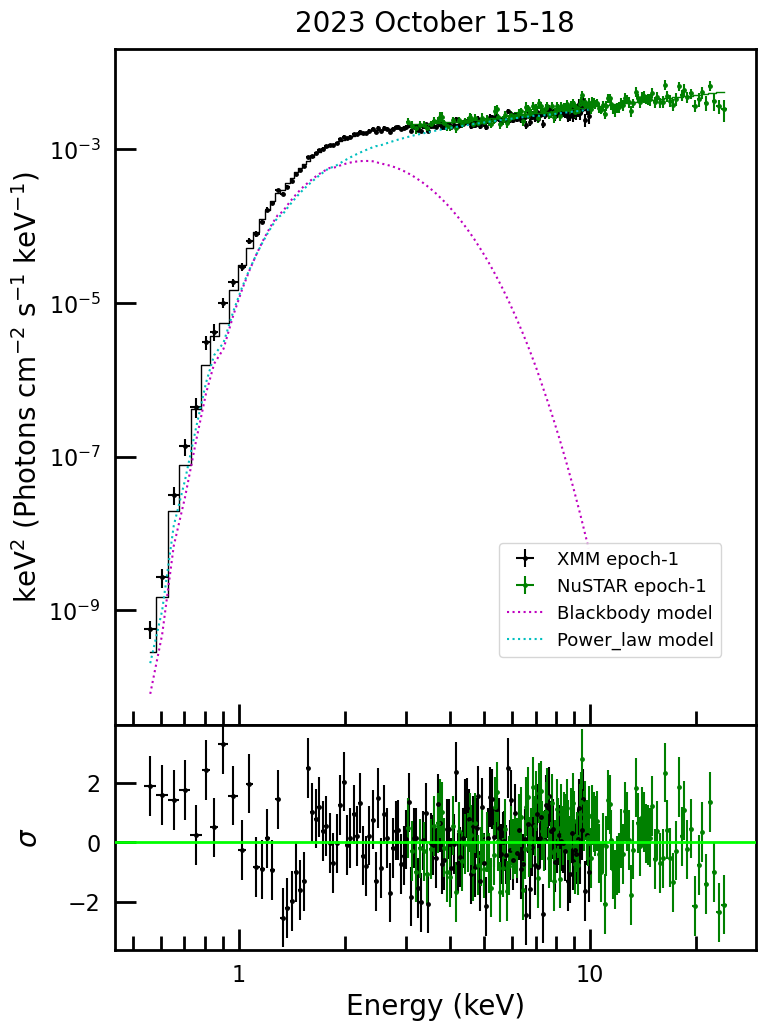

In [20]:
f1 = plt.figure(figsize=(8.27,11.69))  #a4

gs = gridspec.GridSpec(200,200) 
gs.update(wspace=0,hspace=0)# top=1.1)

up =  plt.subplot(gs[:150,:200])
up.errorbar(data_1[:,0], data_1[:,2], xerr=data_1[:,1], yerr=data_1[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='black',label = 'XMM epoch-1')
up.errorbar(data_1[:,0], data_1[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 

up.errorbar(data_1b[:,0], data_1b[:,2], xerr=data_1b[:,1], yerr=data_1b[:,3], 
             fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g', label = 'NuSTAR epoch-1')
up.errorbar(data_1b[:,0], data_1b[:,4], color= 'g', lw=1, drawstyle = 'steps-mid') 


up.errorbar(data_1[:,0], data_1[:,5], 
            fmt=':', fillstyle = 'none', mec='m', mew = 2, ms=3, color='m', label="Blackbody model")

up.errorbar(data_1[:,0], data_1[:,6], 
            fmt=':', fillstyle = 'none', mec='c', mew = 2, ms=3, color='c', label="Power_law model")



up.set_yscale('log')
up.set_xscale('log')

up.xaxis.set_visible(True)
#up.tick_params(axis='x', which='both',labelbottom='off')
up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)

up.set_ylabel('keV$^2$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=20, fontweight=style)#, labelpad=23)
up.legend(loc=[0.6,0.1], fontsize=13) 
up.set_title('2023 October 15-18', fontsize=20, pad=13)

below = plt.subplot(gs[150:200,:200])

below.axhline(y = 0, color = 'lime', lw = 2, zorder=10)

below.errorbar(resdata_1[:,0], resdata_1[:,2], xerr=resdata_1[:,1], 
    yerr=resdata_1[:,3], fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')

below.errorbar(resdata_1b[:,0], resdata_1b[:,2], xerr=resdata_1b[:,1], 
    yerr=resdata_1b[:,3], fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g')



below.set_xscale('log')
below.set_ylim([-3.6,3.95])

below.set_ylabel( '$\sigma$', fontsize = 20, fontweight=style, labelpad=18)
below.set_xlabel('Energy (keV)', fontsize = 20, fontweight=style)


below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)

for axis in [up,below]:
	axis.tick_params(which='major', width=2,length=15,labelsize=16,pad=10,direction='in')
	axis.tick_params(which='minor', width=2,length=10,labelsize=16,pad=10,direction='in')
	
	for ax in ['top','bottom','left','right']:
    		axis.spines[ax].set_linewidth(2)

plt.savefig('eeufspec_persistent_spectra_SGRJ1935_Epoch1.pdf', bbox_inches = 'tight')
plt.show()

/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_73009/3155187026.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)
/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_73009/3155187026.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)


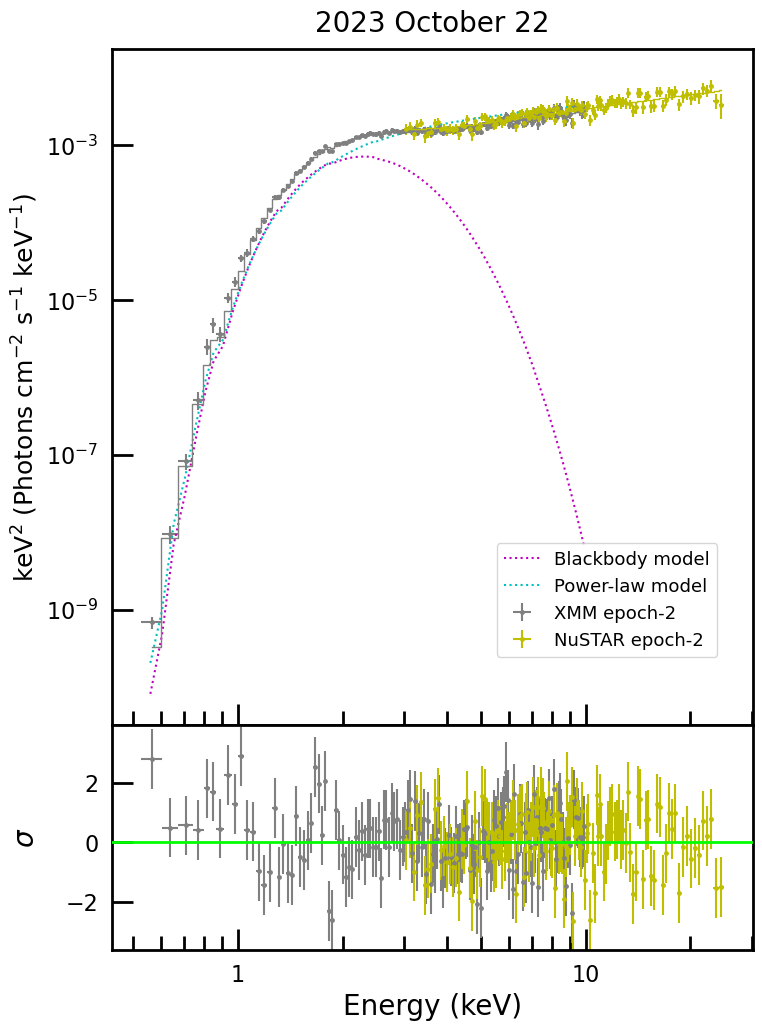

In [22]:
f1 = plt.figure(figsize=(8.27,11.69))  #a4

gs = gridspec.GridSpec(200,200) 
gs.update(wspace=0,hspace=0)# top=1.1)

up =  plt.subplot(gs[:150,:200])


up.errorbar(data_1[:,0], data_1[:,5], 
            fmt=':', fillstyle = 'none', mec='m', mew = 2, ms=3, color='m', label="Blackbody model")

up.errorbar(data_1[:,0], data_1[:,6], 
            fmt=':', fillstyle = 'none', mec='c', mew = 2, ms=3, color='c', label="Power-law model")



up.errorbar(data_2[:,0], data_2[:,2], xerr=data_2[:,1], yerr=data_2[:,3], 
             fmt = '.', fillstyle = 'none', mec='gray', mew = 2, ms=3, color='gray',label = 'XMM epoch-2')
up.errorbar(data_2[:,0], data_2[:,4], color= 'gray', lw=1, drawstyle = 'steps-mid') 

up.errorbar(data_2b[:,0], data_2b[:,2], xerr=data_2b[:,1], yerr=data_2b[:,3], 
             fmt = '.', fillstyle = 'none', mec='y', mew = 2, ms=3, color='y', label = 'NuSTAR epoch-2')
up.errorbar(data_2b[:,0], data_2b[:,4], color= 'y', lw=1, drawstyle = 'steps-mid') 


up.set_yscale('log')
up.set_xscale('log')

up.xaxis.set_visible(True)
#up.tick_params(axis='x', which='both',labelbottom='off')
up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)

up.set_ylabel('keV$^2$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=18, fontweight=style)#, labelpad=23)
up.legend(loc=[0.6,0.1], fontsize=13) 
up.set_title('2023 October 22', fontsize=20, pad=13)


below = plt.subplot(gs[150:200,:200])

below.axhline(y = 0, color = 'lime', lw = 2, zorder=10)




below.errorbar(resdata_2[:,0], resdata_2[:,2], xerr=resdata_2[:,1], 
    yerr=resdata_2[:,3], fmt = '.', fillstyle = 'none', mec='gray', mew = 2, ms=3, color='gray')

below.errorbar(resdata_2b[:,0], resdata_2b[:,2], xerr=resdata_2b[:,1], 
    yerr=resdata_2b[:,3], fmt = '.', fillstyle = 'none', mec='y', mew = 2, ms=3, color='y')


below.set_xscale('log')
below.set_ylim([-3.6,3.95])

below.set_ylabel( '$\sigma$', fontsize = 20, fontweight=style, labelpad=18)
below.set_xlabel('Energy (keV)', fontsize = 20, fontweight=style)


below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)

for axis in [up,below]:
	axis.tick_params(which='major', width=2,length=15,labelsize=16,pad=10,direction='in')
	axis.tick_params(which='minor', width=2,length=10,labelsize=16,pad=10,direction='in')
	
	for ax in ['top','bottom','left','right']:
    		axis.spines[ax].set_linewidth(2)

plt.savefig('eeufspec_persistent_spectra_SGRJ1935_Epoch2.pdf', bbox_inches = 'tight')
plt.show()